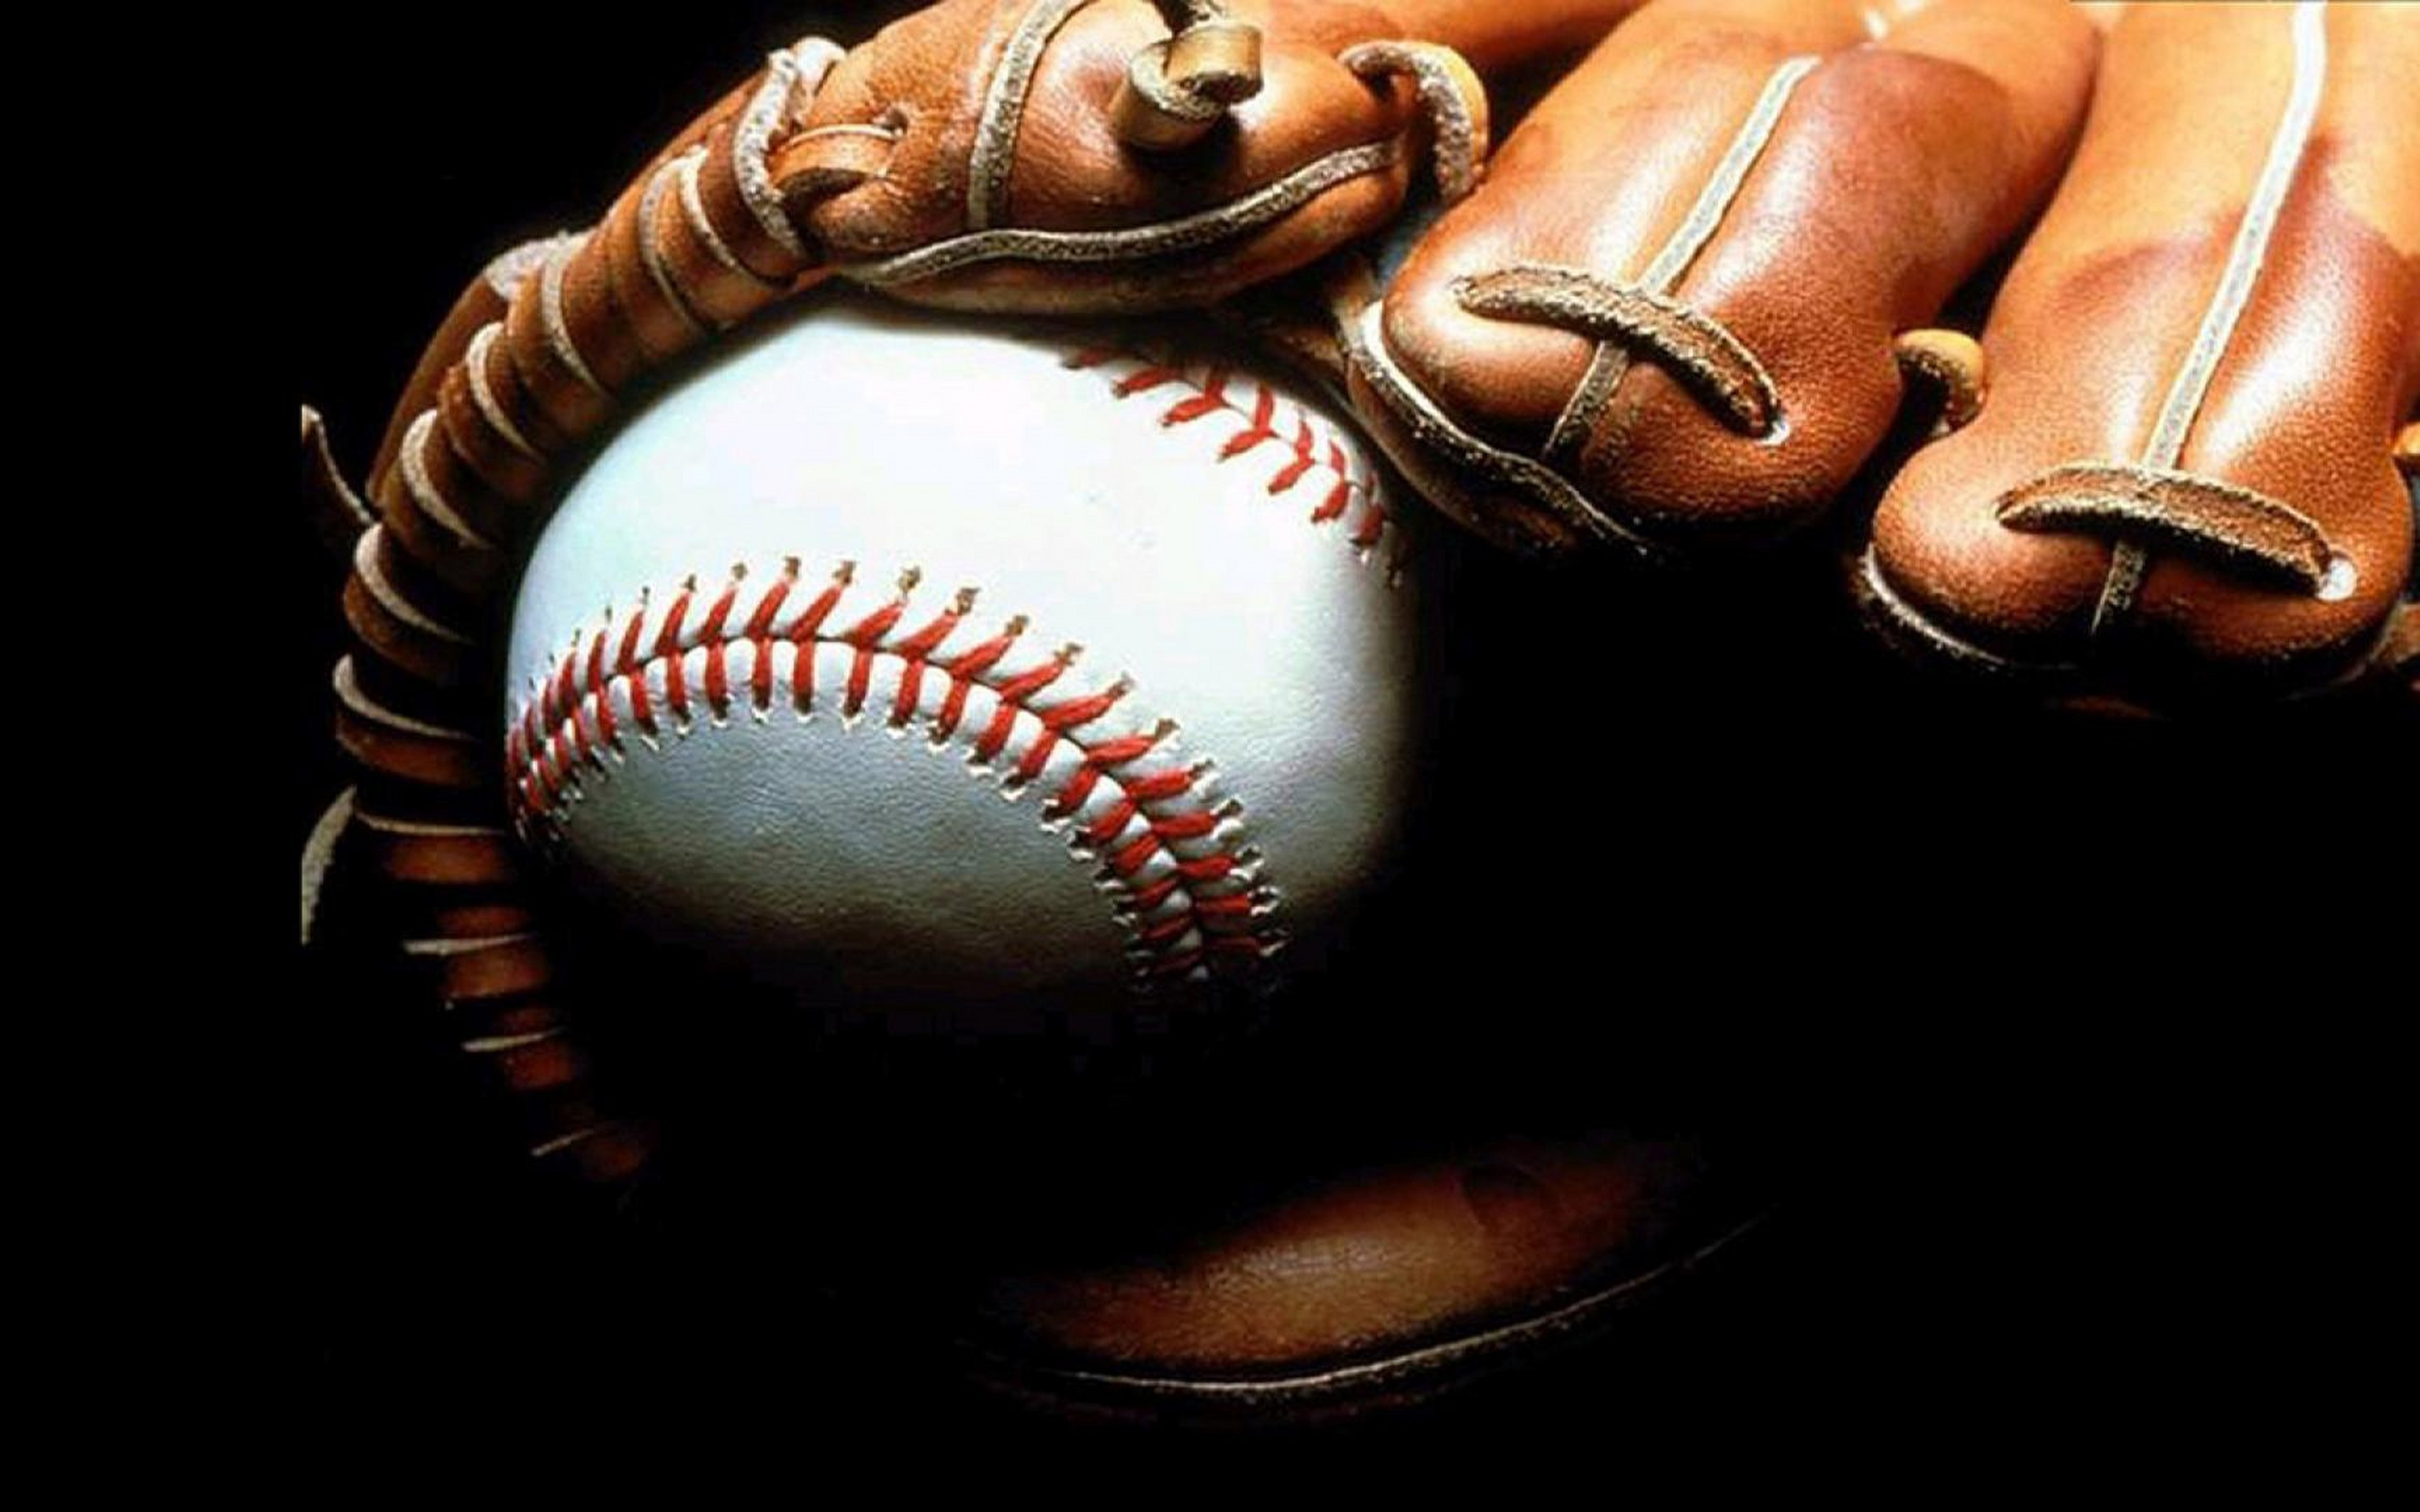

### Baseball Case Study

#### Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
BB = pd.read_csv('/Users/prita/Downloads/DATASETS/Capstone Project/Baseball/baseball.csv')

BB

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
BB.shape

(30, 17)

#### Understanding the dataset for analyzing the data
W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

R – Runs scored: number of times a player crosses home plate

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

H – Hit: reaching base because of a batted, fair ball without error by the defense

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error 

HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

SO – Strikeout: number of batters who received strike three

SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

RA – Run average: number of runs allowed times nine divided by innings pitched

ER – Earned run: number of runs that did not occur as a result of errors or passed balls

ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

CG – Complete game: number of games where player was the only pitcher for their team

SHO – Shutout: number of complete games pitched with no runs allowed

SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

The dataset contains 16 features which contains the statistics summary of the baseball players and other one is our target variable. In this dataset 'W' is the target variable, which contains the number of predicted wins. Also we can see that the dataset contains only numerical values. and no categorical data. So by observing the dataset and problem statement it's a Regression type problem.

### Exploratory Data Analysis (EDA)

In [4]:
# checking the dimension of the dataset
BB.shape

(30, 17)

The dataset has 30 rows and 17 columns, which includes the target variable.

In [5]:
# Checking the datatypes of the dataset
BB.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

The dataset contains all integer data type, except one with float datatype for ERA

As the dataset contains all numeric datatype, hence encoding will not be required

In [6]:
# Checking the overview of dataset

BB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


 This information gives a better overview that we have no null values and no object type data

In [7]:
# checking the number of unique values in the dataset
BB.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [8]:
# Checking and reconfirming the null values

BB.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values

<AxesSubplot:>

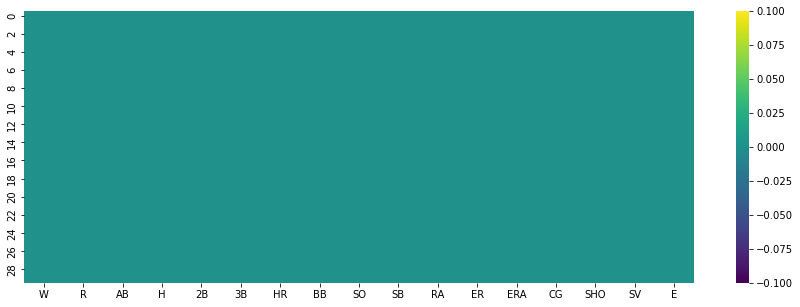

In [9]:
plt.figure(figsize=(15,5))

sns.heatmap(BB.isnull(),cmap='viridis')

This clearly shows no null values in the dataset

In [10]:
 BB.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

These are the columns available in the dataset

In [11]:
# Checking the uniqueness of the target variable

BB['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

These are the unique values seen in the label

In [12]:
# Checking the value count of the label
BB['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

We can see the list of value counts of the target variable

### Statistical Description of the DataSet

In [13]:
BB.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there are no negative/ invalid values present.

From the above description we can observe the following things.

The counts of all the columns are same, this means there are no null values present in any of the columns.

In the target column we can observe the mean is bit less than median(50%), so it is skewed to the left. Since the mean is 80.96 and maximum is 100, it means that the team won more matches.

In the column R(Runs) also median is more than the mean then it is skewed to left. these differences can also be seen in the columns 2B, BB, SO, RA, ER, ERA and SHO. These columns are skewed to left.

The mean is more than median in the columns AB, H, HR, SV and E which means they are skewed to right.

Also the mean and the median are same in the columns 3B and SB which means the data is normal or symmetrical. Also the feature CG has mean bit higher than the meadian so its almost normal.

There is a huge differences in max and 75% percentile(3rd quantile).

So from these observations we can conclude that the ourliers present in many of these columns. We will remove these outliers using some methods later.

<AxesSubplot:>

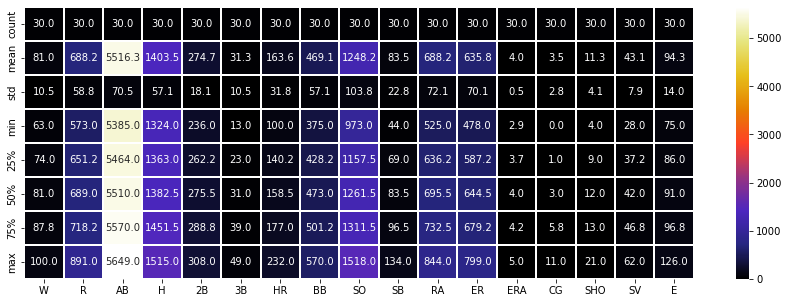

In [14]:
# Visualizing the statistics of the columns using Heatmap
plt.figure(figsize=(15,5))

sns.heatmap(BB.describe(),linewidths=0.1,fmt='0.1f',annot=True, cmap='CMRmap')

### Data Visualization

#### Univariate Analysis

<AxesSubplot:xlabel='W', ylabel='Count'>

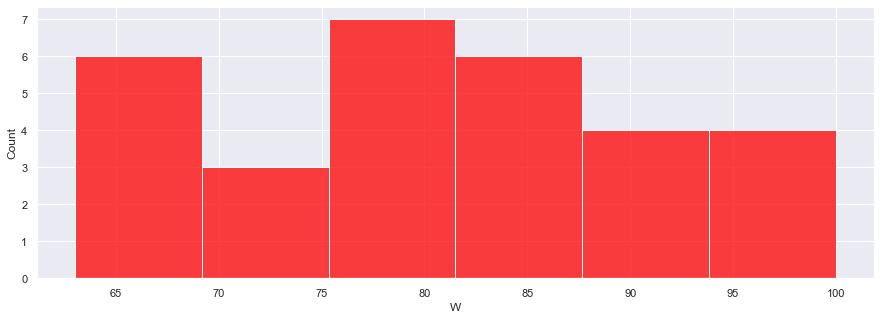

In [15]:
# Histogram for target variable
sns.set(style="darkgrid")

plt.figure(figsize=(15,5))

sns.histplot(BB["W"], color='red')

From this histogram plot, we can see that the data is normally distributed and there is no presence of skewness. The minimum wins of the team rate is 63 and maximum is 100 also mean of wins of the team rate is 80. The wins of the team is more between 75 to 80 and it is low in the range 70 to 75.

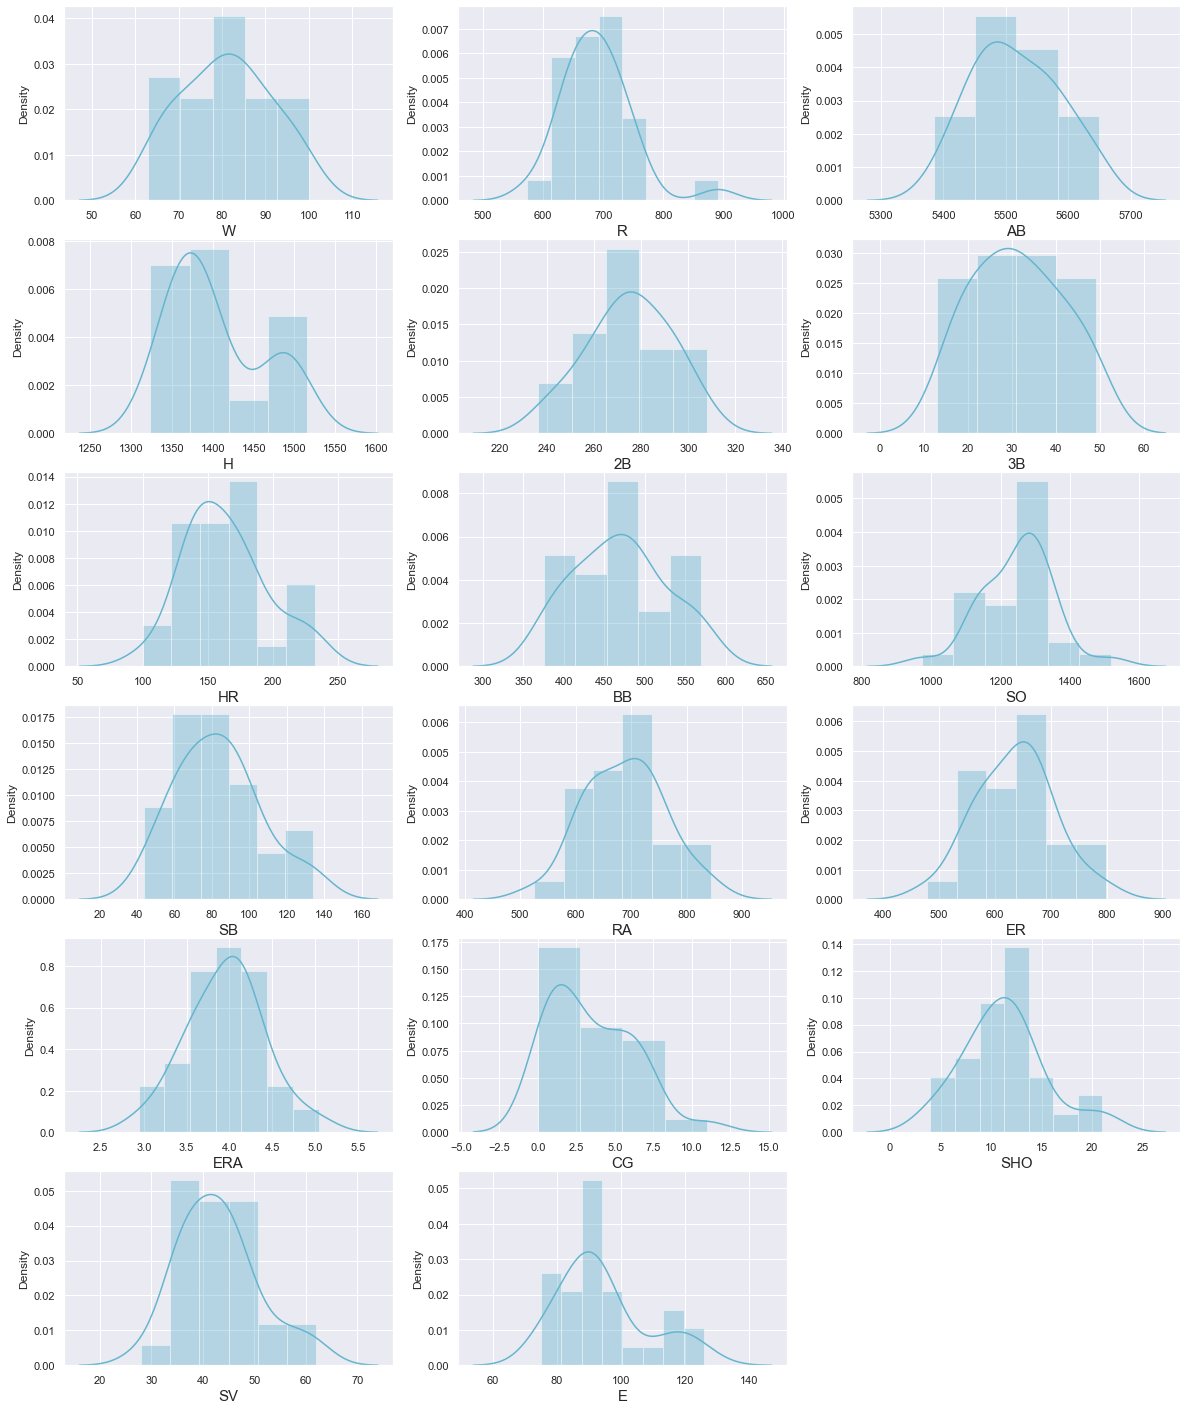

In [16]:
# Checking how the data has been distriubted in each column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in BB:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(BB[column],color='c')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

From the distplot we can observe the following

The target column 'W'(wins) looks normally distributed.

The data in the feature 'R'(Runs) is not normal and the median is more than the mean so it is skewed to left.

The data in the features 'H'(Hits), 'HR'(homeruns),'SV'(saves) and 'E'(errors) are not normal and skewed to right.

'2B'(doubles) also looks normal and bit skewed.

'3B'(tribles) and 'SB'(Stolen Bases) the data is normally distributed and there is no skewness. 

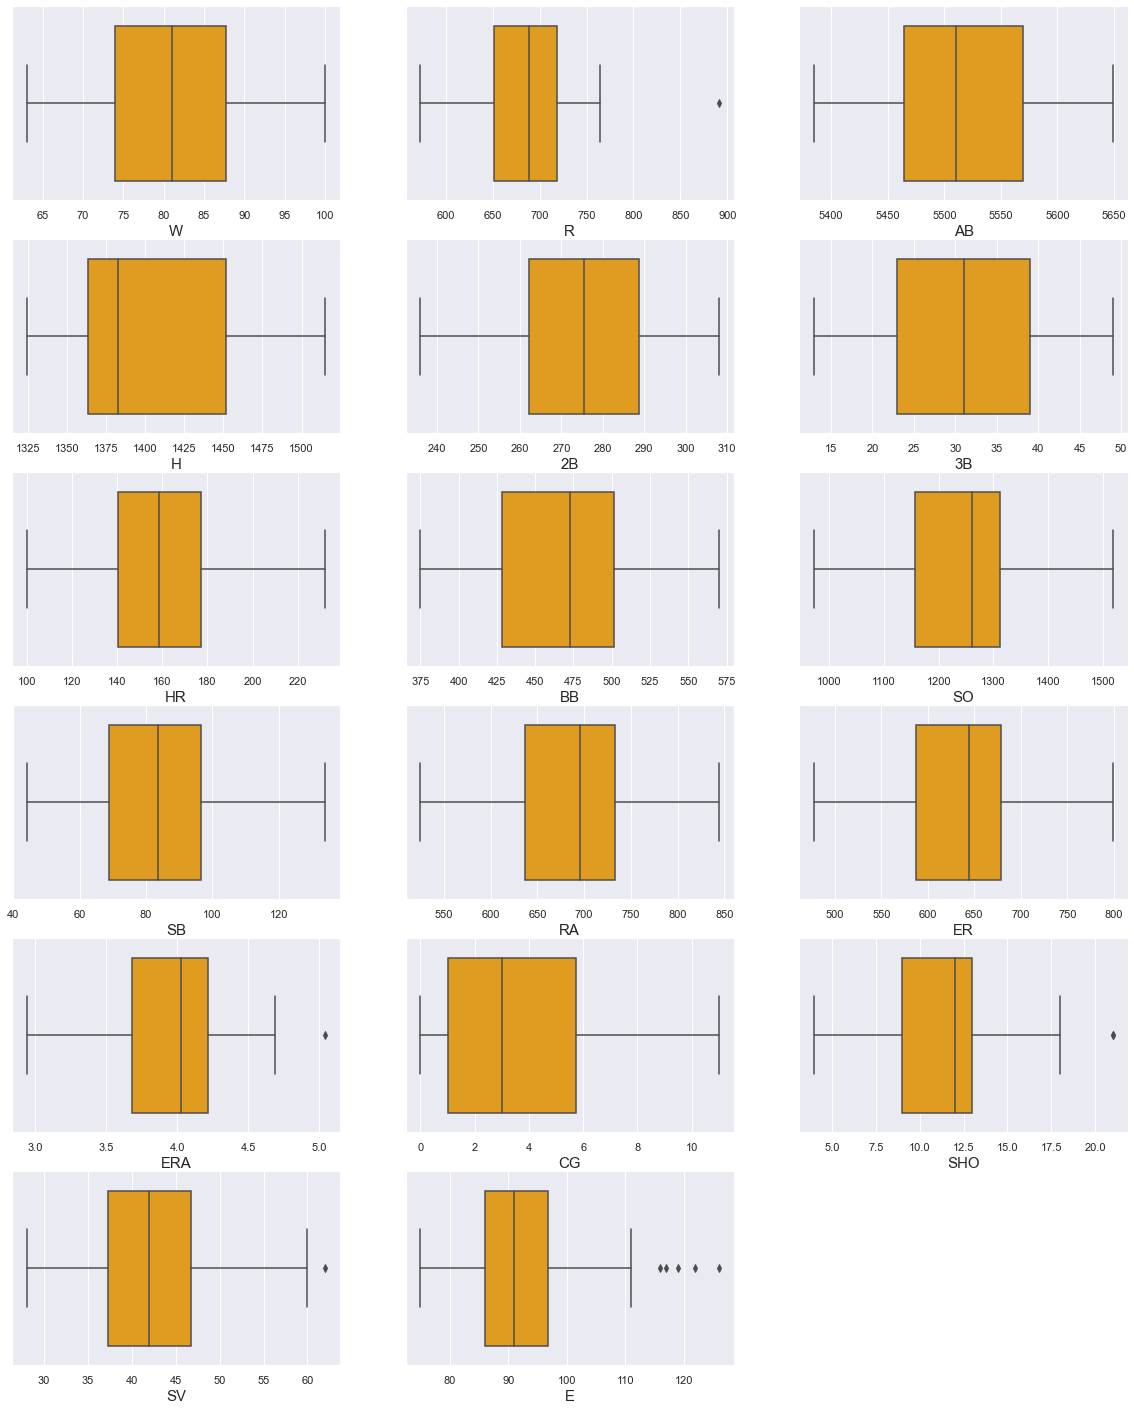

In [17]:
# Checking for outliers

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in BB:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(BB[column],color='Orange')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

By observing the boxplots we can observe the outliers are present in the columns 'R', 'ERA', 'SHO', 'SV', and 'E'. We will remove these outliers using either Zscore method

### Bivariate Analysis

Text(0, 0.5, 'Errors')

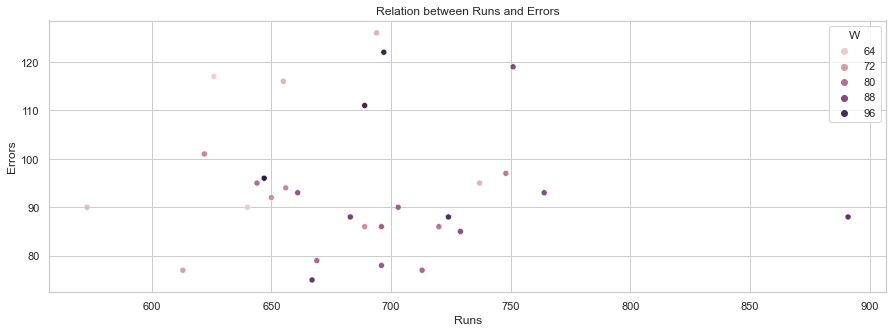

In [18]:
# Checking the relation between runs and errors
sns.set(style="whitegrid")

plt.figure(figsize=[15,5])
plt.title('Relation between Runs and Errors')
sns.scatterplot(BB['R'],BB['E'],hue=BB["W"]);
plt.xlabel("Runs")
plt.ylabel("Errors")

This scatter plot gives the relation between the Runs and the Errors on the basis of Wins. There is no linear relationship between these columns. We can infer that there is no correlation.

Text(0, 0.5, 'Hits')

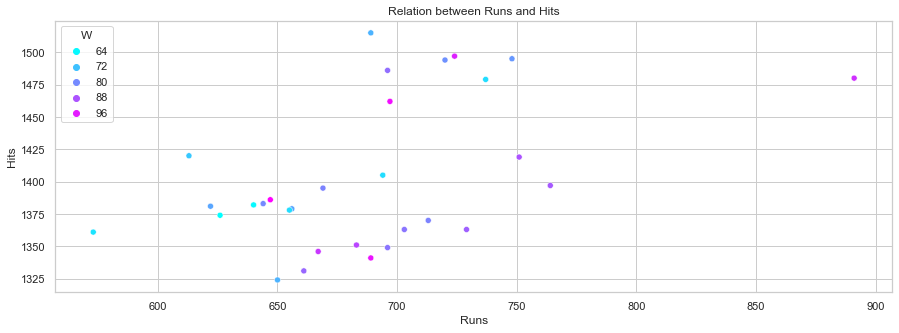

In [19]:
# Checking the corelation between runs and hits
sns.set(style="whitegrid")

plt.figure(figsize=(15,5))
plt.title('Relation between Runs and Hits')
sns.scatterplot(BB['R'],BB['H'],hue=BB['W'],palette='cool');
plt.xlabel('Runs')
plt.ylabel('Hits')

As we can infer that the there is no linearity between the columns.

Text(0, 0.5, 'Hits')

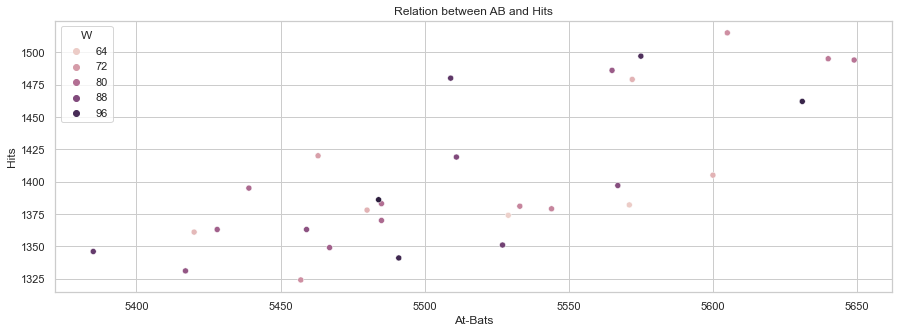

In [20]:
# Checking the relation between AB and Hits

plt.figure(figsize=(15,5))
plt.title('Relation between AB and Hits')
sns.scatterplot(BB['AB'],BB['H'],hue=BB['W']);
plt.xlabel('At-Bats')
plt.ylabel('Hits')

We can observe a slight collinearity between the features, as it shows as the AB increases, hits also increases

Text(0, 0.5, 'RA')

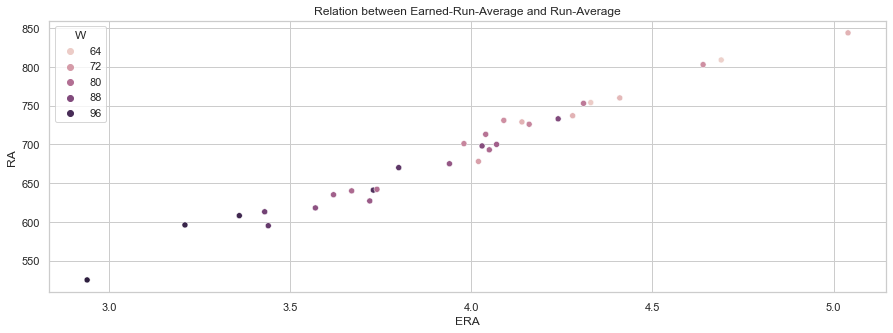

In [21]:
# Checking the relation between ERA and RA
plt.figure(figsize=(15,5))
plt.title('Relation between Earned-Run-Average and Run-Average')
sns.scatterplot(BB['ERA'],BB['RA'],hue=BB['W']);
plt.xlabel('ERA')
plt.ylabel('RA')

We see a positive collinearity between both the features. As the Run Average increases, the Earned-Run-Average also increases. This indicates the winning rate also increases

Text(0, 0.5, 'Wins')

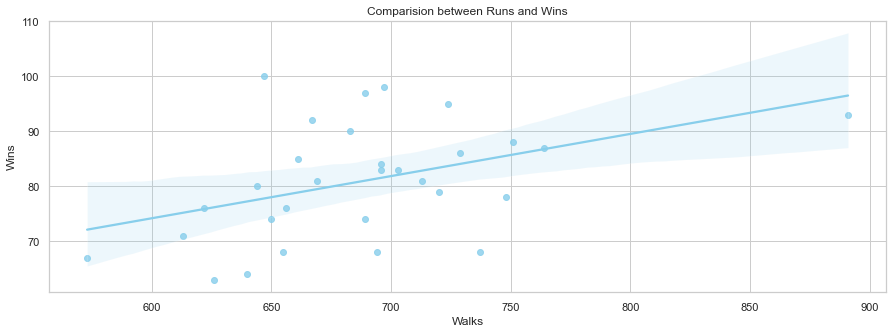

In [22]:
#Checking the relation between Runs and Wins
plt.figure(figsize=(15,5))
plt.title('Comparision between Runs and Wins')
sns.regplot(BB['R'],BB['W'],color='skyblue')
plt.xlabel('Walks')
plt.ylabel('Wins')

Here we can see a positive trend in the relation. It can be seen that as the run rate increases, the win rate also increases.

Text(0, 0.5, 'Wins')

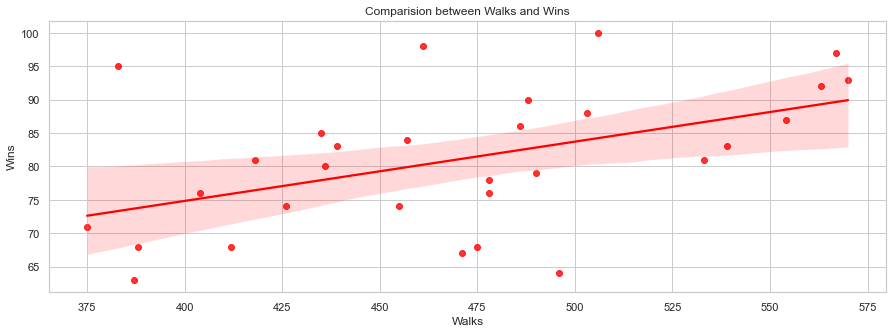

In [23]:
# checking the comparision between wins and walk
plt.figure(figsize=(15,5))
plt.title('Comparision between Walks and Wins')
sns.regplot(BB['BB'],BB['W'],color='red')
plt.xlabel('Walks')
plt.ylabel('Wins')

Here also the winning rate of the team increases as the number of Walks increases.

Text(0, 0.5, 'Wins')

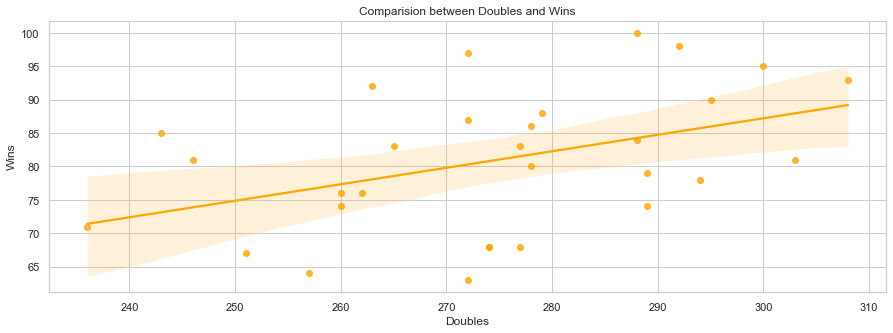

In [24]:
# Checking the relation between Doubles and Wins
plt.figure(figsize=[15,5])
plt.title('Comparision between Doubles and Wins')
sns.regplot(BB['2B'],BB['W'],color="orange");
plt.xlabel("Doubles")
plt.ylabel("Wins")

The doubles also have good relationship with the target. When there is high number of doubles then there is high chances of winning.

Text(0, 0.5, 'Wins')

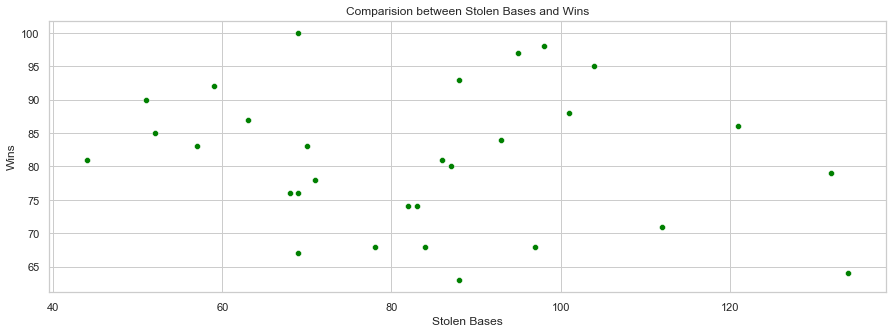

In [25]:
# Checking the relation between stolen bases and Wins
plt.figure(figsize=[15,5])
plt.title('Comparision between Stolen Bases and Wins')
sns.scatterplot(BB['SB'],BB['W'],color="green");
plt.xlabel("Stolen Bases")
plt.ylabel("Wins")

There is no linear relationship exists between these columns. The winning rate is high in the range 95-100 SB.

Text(0, 0.5, 'Wins')

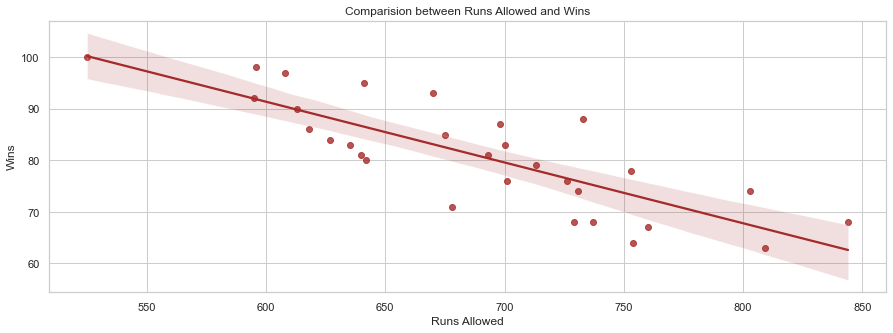

In [26]:
# Checking the relation between Wins and Runs Allowed
plt.figure(figsize=[15,5])
plt.title('Comparision between Runs Allowed and Wins')
sns.regplot(BB['RA'],BB['W'],color='brown')
plt.xlabel("Runs Allowed")
plt.ylabel("Wins")

The target column has negative linear relationship with the feature Runs Allowed, since the data is falling from left to right which means label is highly correlated with the feature.

Text(0, 0.5, 'Wins')

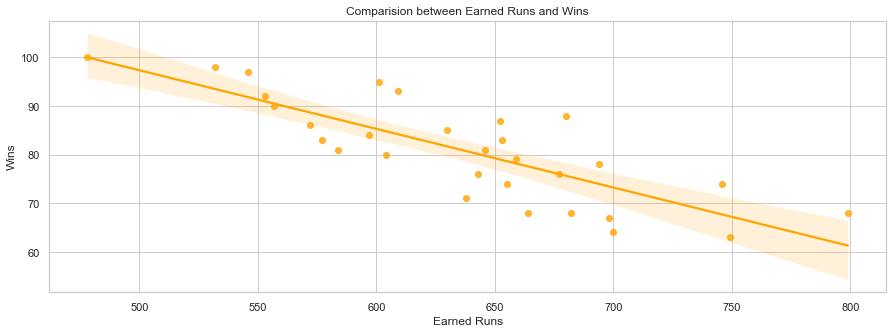

In [27]:
# Checking the relation between Earned Runs and Wins
plt.figure(figsize=[15,5])
plt.title('Comparision between Earned Runs and Wins')
sns.regplot(BB['ER'],BB['W'],color='Orange')
plt.xlabel("Earned Runs")
plt.ylabel("Wins")

It can be observed that the data falling from left to right which means there is inverse linear relationship between the label and the target. As the ER decreases, the winning rate also decreases.

Text(0, 0.5, 'Wins')

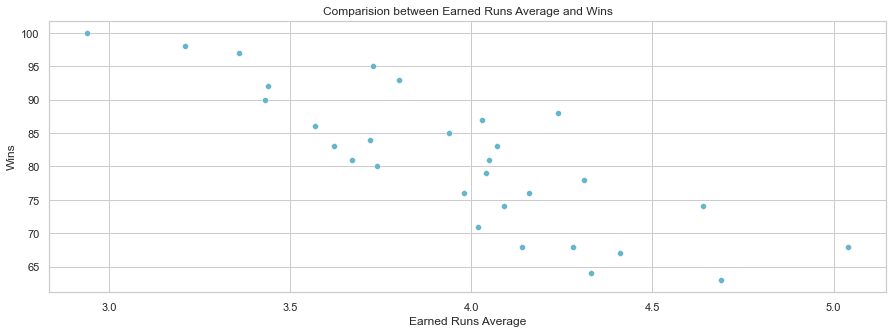

In [28]:
# Checking the relation between Earned Runs Average and Wins
plt.figure(figsize=[15,5])
plt.title('Comparision between Earned Runs Average and Wins')
sns.scatterplot(BB['ERA'],BB['W'], color='c');
plt.xlabel("Earned Runs Average")
plt.ylabel("Wins")

As the ERA decreases Wins rate also decreases, which means negative linear relationship and target is highly correlated with the feature.

Text(0, 0.5, 'Earned Runs Average')

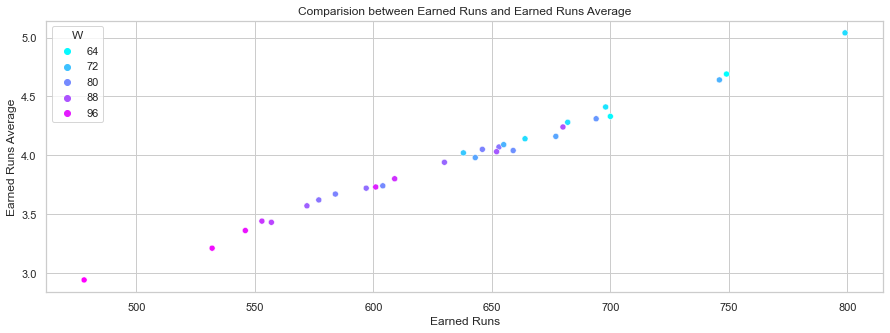

In [29]:
# Checking the relation between Earned Runs and Earned Runs Average
plt.figure(figsize=[15,5])
plt.title('Comparision between Earned Runs and Earned Runs Average')
sns.scatterplot(BB['ER'],BB['ERA'],hue=BB["W"],palette="cool");
plt.xlabel("Earned Runs")
plt.ylabel("Earned Runs Average")

There is a strong linear relationship between the features. As the Earned Runs increases, Earned Runs Average also increases. The winning rate is high in the range 540-650.

Text(0, 0.5, 'Wins')

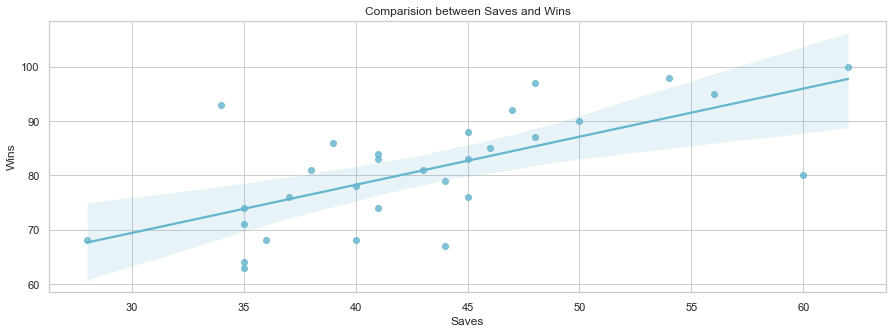

In [30]:
# Checking the relation between Saves and Wins
plt.figure(figsize=[15,5])
plt.title('Comparision between Saves and Wins')
sns.regplot(BB['SV'],BB['W'],color="c");
plt.xlabel("Saves")
plt.ylabel("Wins")

It can be observed that there is a positive linear relationship between the feature Saves and the label. As the Saves increases the wins of the team also increases.

Text(0, 0.5, 'Wins')

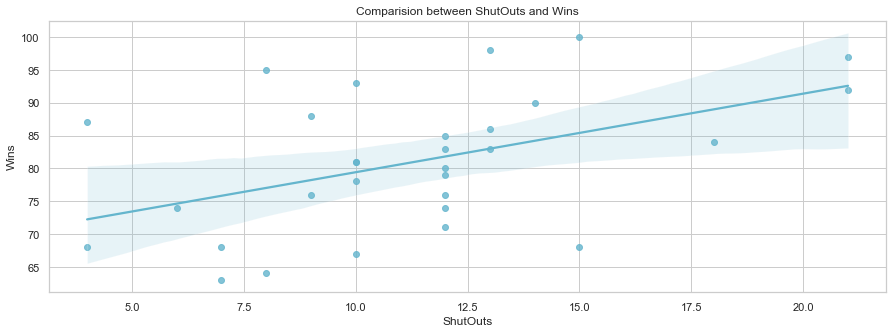

In [31]:
# Checking the relation between ShutOuts and Wins
plt.figure(figsize=[15,5])
plt.title('Comparision between ShutOuts and Wins')
sns.regplot(BB['SHO'],BB['W'],color="c");
plt.xlabel("ShutOuts")
plt.ylabel("Wins")

There is not much linearity between the feature and the label. In some of the data we can see that whenever the shutOuts is high then there is a chance of win.

Text(0, 0.5, 'Wins')

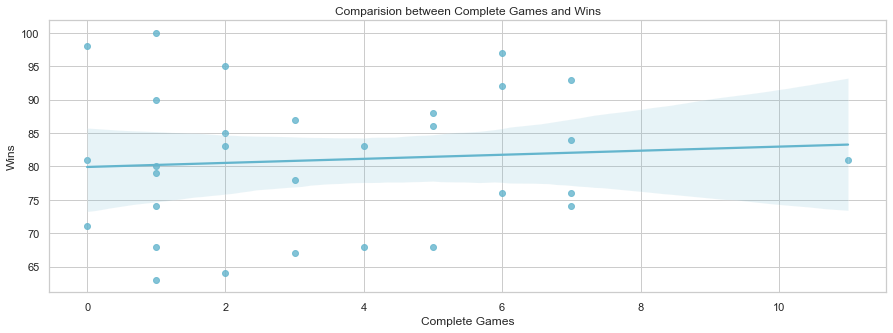

In [32]:
# Checking the relation between Complete Games and Wins
plt.figure(figsize=[15,5])
plt.title('Comparision between Complete Games and Wins')
sns.regplot(BB['CG'],BB['W'],color="c");
plt.xlabel("Complete Games")
plt.ylabel("Wins")

It can be observed that the data is scattered and it does not have much linear relationship between the feature and the label.

Text(0, 0.5, 'Wins')

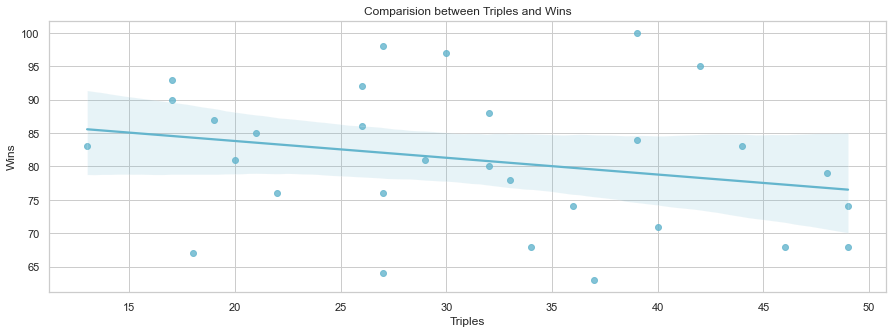

In [33]:
# Checking the relation between Triples and Wins
plt.figure(figsize=[15,5])
plt.title('Comparision between Triples and Wins')
sns.regplot(BB['3B'],BB['W'],color="c");
plt.xlabel("Triples")
plt.ylabel("Wins")

There is a negative linear relationship between the feature 3B and the label Wins

Text(0, 0.5, 'Wins')

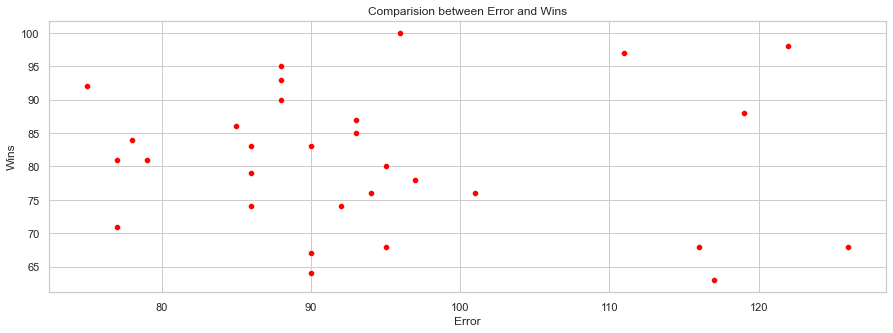

In [34]:
# Checking the relation between Error and Wins
plt.figure(figsize=[15,5])
plt.title('Comparision between Error and Wins')
sns.scatterplot(BB['E'],BB['W'],color="red");
plt.xlabel("Error")
plt.ylabel("Wins")

The data is scattered and there is no linear relationship between the two columns. As we can see the Error level is high in the range 86-95(say).

### Multivariate Analysis

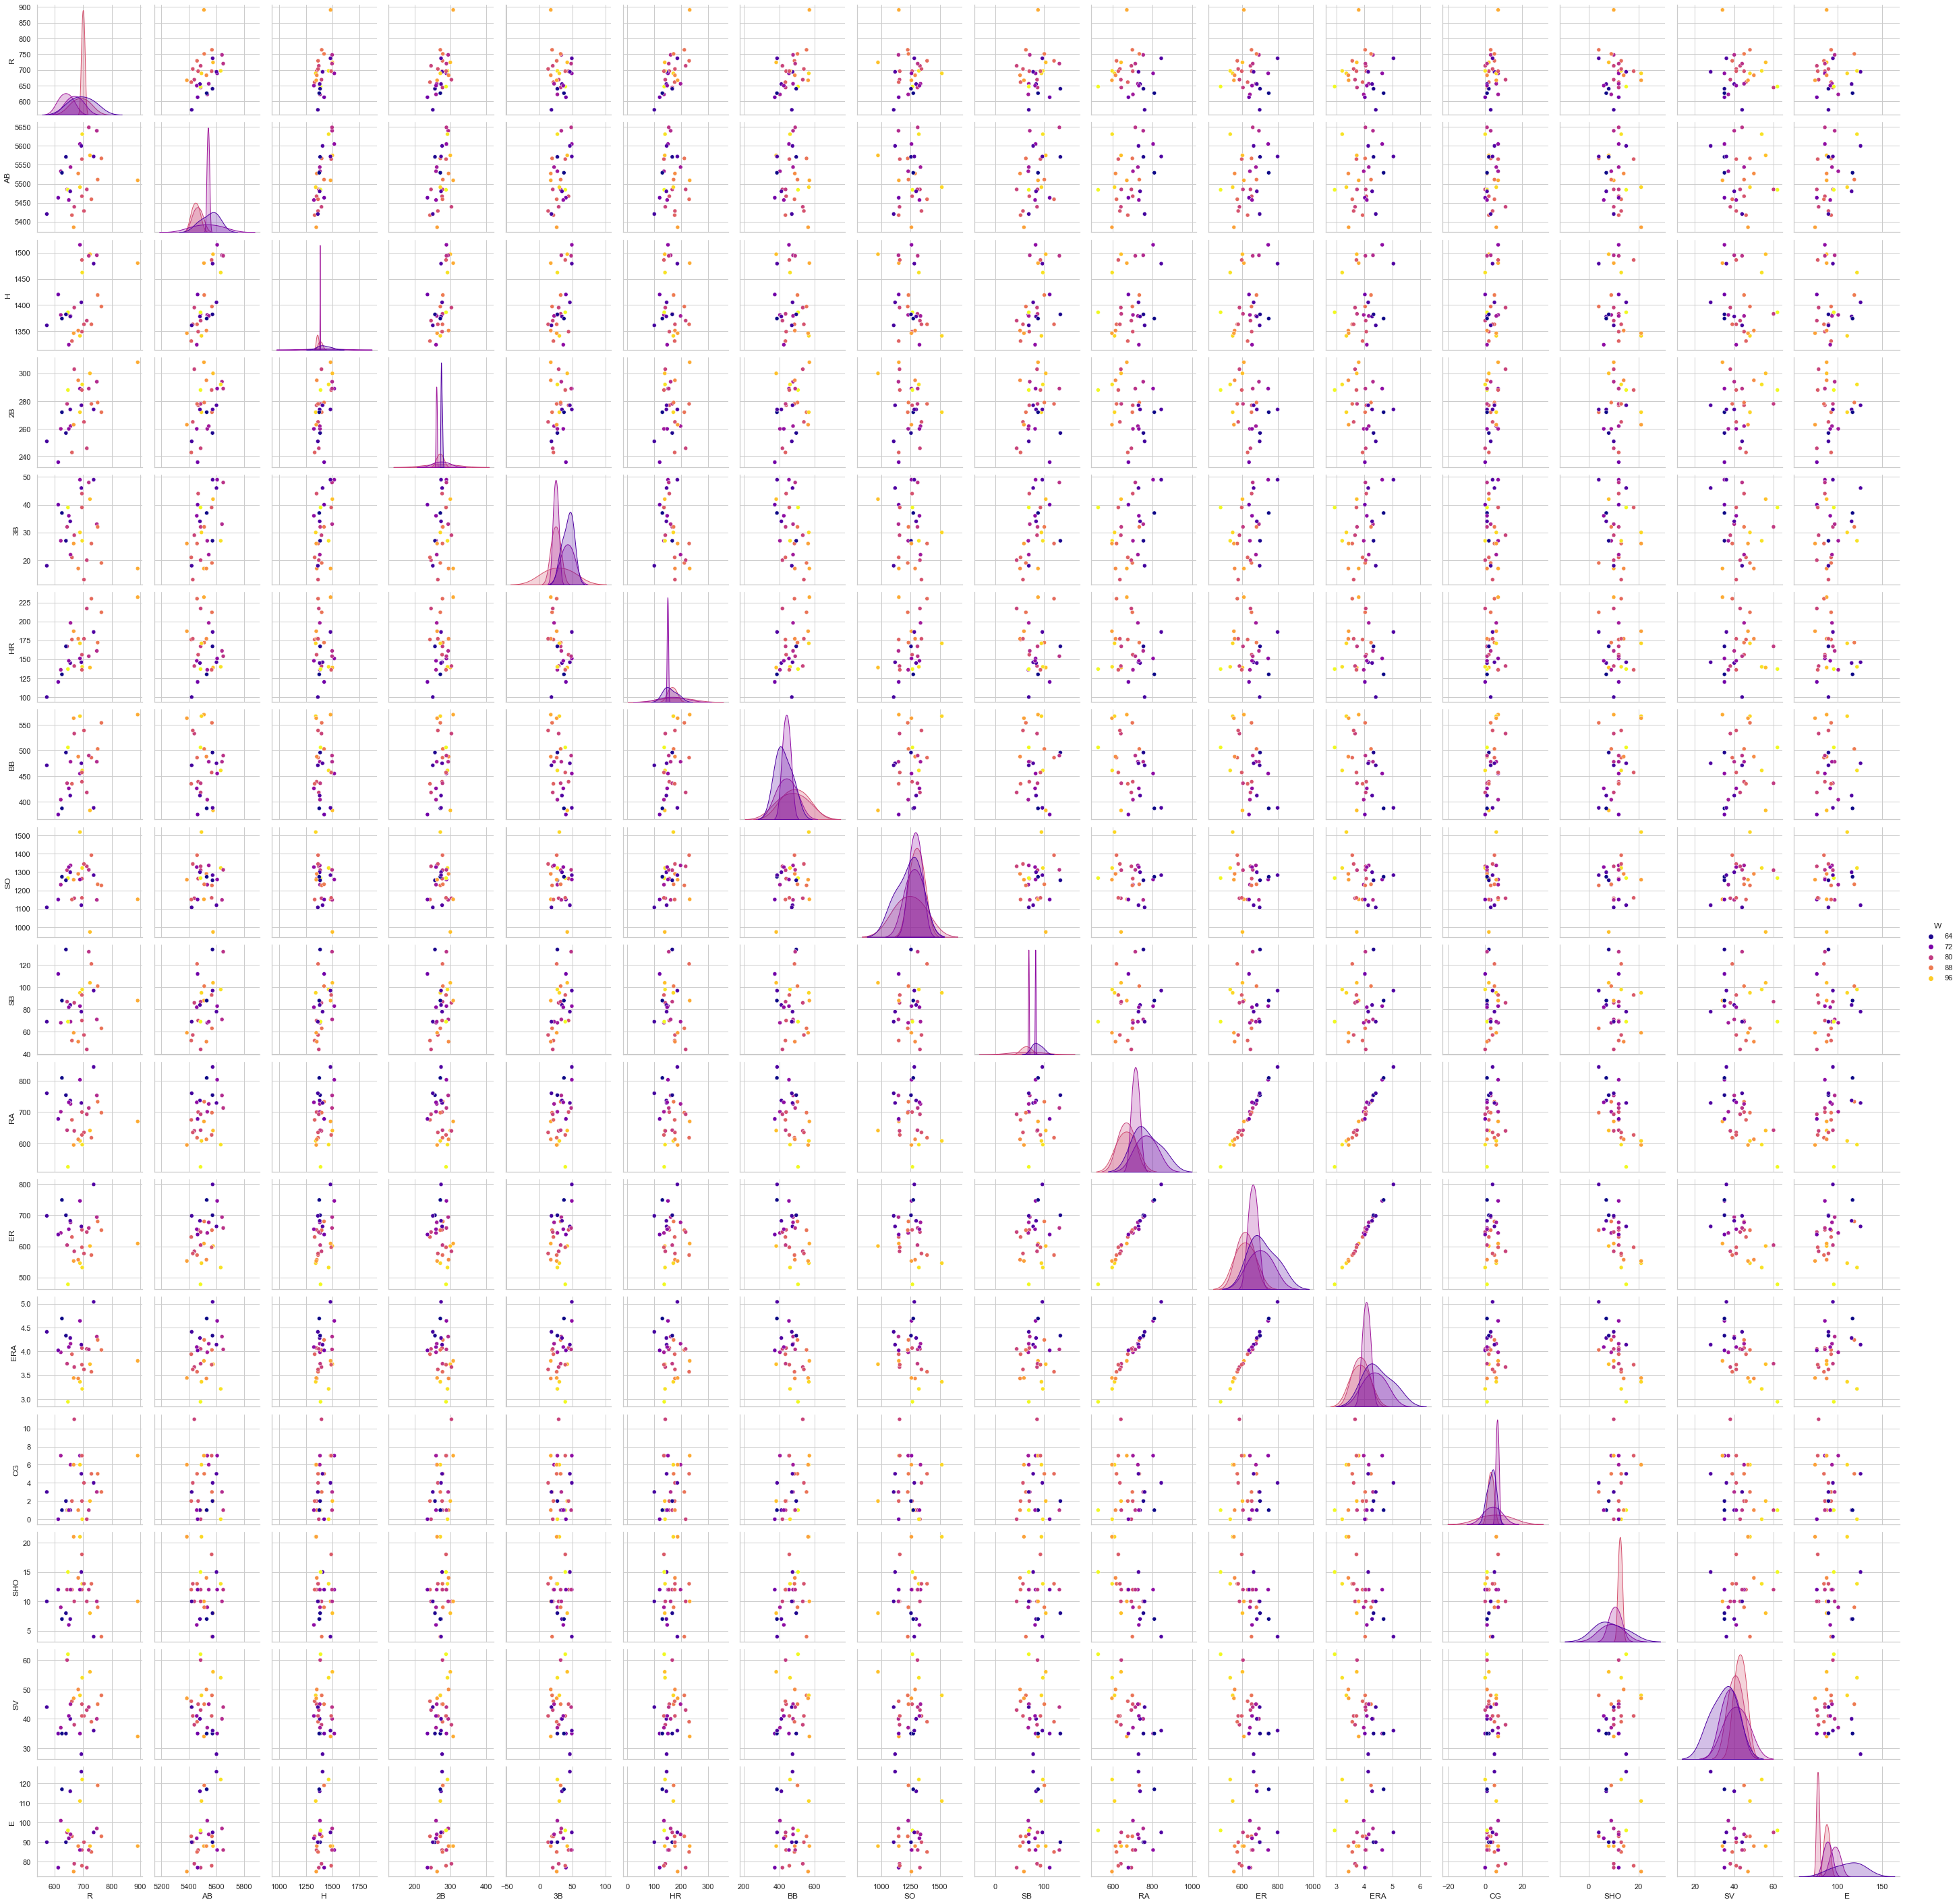

In [35]:
# Checking the pairwise relation in the dataset.

sns.pairplot(BB,hue="W",palette="plasma")

This pair plot gives the pairwise relation between the columns which are plotted on the basis of target variable "W". Here we can observe the relation between the features and label.

From this pair plot we can observe that the existence of correlation between two variables and on the diagonal we can see distribution plotting.

### Correlation between the target variable and independent variables using HEAT map

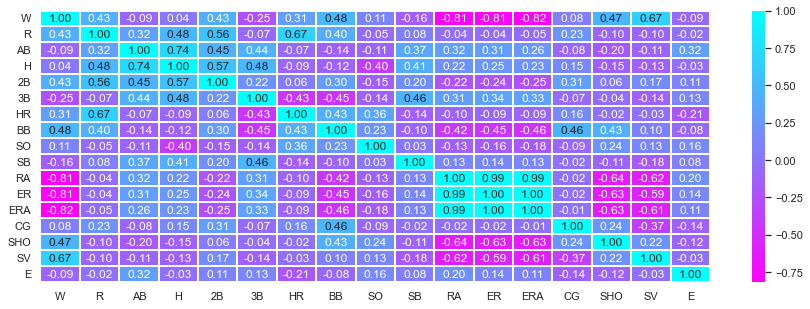

In [36]:
# Checking the correlation
BB.corr

# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,5))
sns.heatmap(BB.corr(),linewidths=.1,fmt='0.2f', cmap="cool_r", annot = True)
plt.yticks(rotation=0);

This heat map contains both positive and negative correlation.

The target "W" is positively correlated with the features "SV", "SHO", "BB", "HR", "2B", "R" and "SO" .
The target "W" is highly negatively correlated with the features "ERA","ER" and "RA".
The label "W" is also negatively correlated with the features "E", "SB", "3B" and "AB".
Apart from this label and feature relation we can also infer that the features "ERA", "ER" and "RA" are highly positively correlated with each other. Which causes multicollinearity problem, to avoid this problem will check VIF value and will drop the columns if necessary.
The column "H" and "CG" has no correlation with the label, we can drop these columns.

### Visualizing the correlation between label and features using bar plot

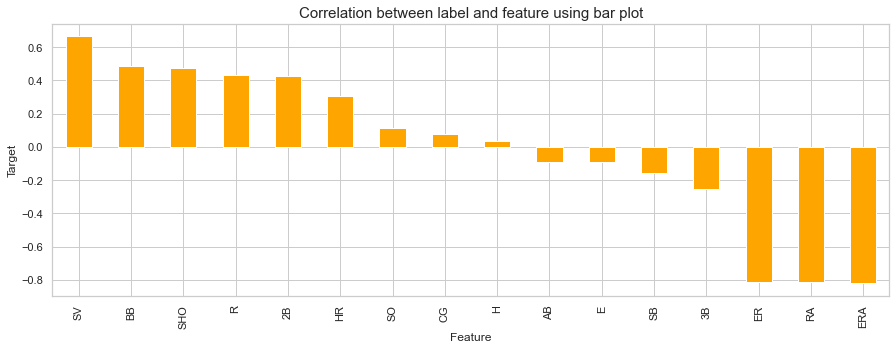

In [37]:
plt.figure(figsize=(15,5))
BB.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='orange')
plt.xlabel('Feature',fontsize=12)
plt.ylabel('Target',fontsize=12)
plt.title('Correlation between label and feature using bar plot',fontsize=15)
plt.show()

Now we can easily analyse the data, here the feature "H" and "CG" has very less correlation with the label. Let's drop them.

### Data Cleaning

In [38]:
BB.drop("H", axis=1, inplace=True)

In [39]:
BB.drop("CG", axis=1, inplace=True)

In [40]:
BB.head()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86


### Removing Outliers

#### Z score method

In [41]:
BB.columns

Index(['W', 'R', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'SHO', 'SV', 'E'],
      dtype='object')

In [42]:
# Features containing outliers
features = BB[["R","ERA","SHO","SV","E"]]

In [43]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,R,ERA,SHO,SV,E
0,0.619078,0.506955,0.814629,1.671607,0.461470
1,0.134432,0.254598,0.172800,0.249879,0.607197
2,0.332906,0.641347,0.320914,0.654856,1.117242
3,1.146419,0.053010,0.567771,0.784104,0.485758
4,0.013270,1.531318,0.172800,1.042600,0.607197
5,3.509647,0.350165,0.320914,1.171848,0.461470
6,1.311430,0.165003,1.802057,0.637623,0.097152
7,0.428681,0.209800,0.320914,0.008617,1.262970
8,0.765626,0.484557,0.172800,2.188598,0.048576
9,1.034489,0.792164,0.320914,0.396360,0.194303


In [44]:
# Creating new dataframe
new_BB = BB[(z<3).all(axis=1)]
new_BB

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,10,40,97
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,9,45,119


In [45]:
BB.shape 

(30, 15)

BB has 30 rows and 15 columns

In [46]:
new_BB.shape

(29, 15)

new_BB has 29 rows and 15 columns

### Checking for Skewness

In [47]:
# Checking the skewness
new_BB.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

### Removing Skewness using yeo-johnson Method

In [48]:
skewed_features = ["SHO", "SV", "E"]

In [49]:
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [50]:
new_BB[skewed_features] = scaler.fit_transform(new_BB[skewed_features].values)
new_BB[skewed_features].head()

,SHO,SV,E
0,-0.787002,1.532753,-0.348265
1,0.236737,0.312020,-0.540820
2,-0.252844,-0.664137,-1.326125
3,-0.513555,-0.820689,0.650818
4,0.236737,-1.149165,-0.540820


In [51]:
# Now let's check the skewness after using the transformation
new_BB.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Now the skewness has been removed

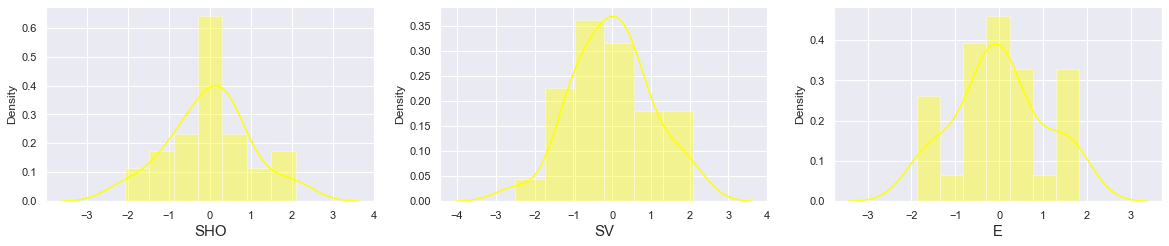

In [52]:
# After removing let's check how the data has been distributed in each column.

sns.set(style="darkgrid")

features_skewed = ["SHO", "SV", "E"]
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_BB[features_skewed]:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(new_BB[column],color='yellow')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

### Data Preprocessing

#### Separating the independent and target variables into x and y

In [53]:
x = new_BB.drop("W", axis=1)
y = new_BB["W"]

The label and the target has been separated

In [54]:
x.shape

(29, 14)

In [55]:
y.shape

(29,)

### Standard Scalarization

In [56]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.513555,0.312020,1.554265


Here the data has been scaled now

### Checking VIF values to solve multicollinearity

In [57]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))


vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,6.219825,R
1,9.828077,AB
2,2.683572,2B
3,3.196853,3B
4,7.369072,HR
5,2.686472,BB
6,2.741072,SO
7,1.757901,SB
8,179.096825,RA
9,1754.643859,ER


The VIF value is more than 10 in the columns "AB", "RA", "ER", "ERA". Let's drop these one by one. First drop the colummn having highest VIF value that is "ER".

In [58]:
x.drop("ER", axis=1, inplace=True)

In [59]:
# Again checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.352902,R
1,3.177214,AB
2,2.597985,2B
3,3.072775,3B
4,4.949255,HR
5,2.561982,BB
6,2.661842,SO
7,1.680467,SB
8,119.939744,RA
9,111.859162,ERA


Observation: Now we can see the multicollinearity still exists, so let me drop the column "RA".

In [60]:
x.drop("RA", axis=1, inplace=True)

In [61]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.250076,R
1,2.238746,AB
2,2.597917,2B
3,3.030073,3B
4,4.562014,HR
5,2.222720,BB
6,2.042786,SO
7,1.568151,SB
8,3.878177,ERA
9,2.651314,SHO


Observation: It can be observed that all the values are less than 10 which means we have solved the multicollinearity problem. let's move to model building.

In [62]:
x.head()

,R,AB,2B,3B,HR,BB,SO,SB,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,0.236737,-1.149165,-0.540820


### Modelling

#### Finding best random state

In [63]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9291790579976076  on Random_state  50


We got the maximum R2 score as 93% on the random state 50.

### Train Test Split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Linear Regression

In [65]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.9291790579976076
MAE: 2.4627865987898456
MSE: 10.163242343651966
RMSE: 3.187984056367278


The R2 score value for Linear Regression model is 93%.

### Linear Regression with Ridge

In [66]:
paramsRidge = {'alpha':[0.01, 0.1, 1.0,10.26], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge=Ridge()
clf=GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'sag'}


In [67]:
# Checking R2 score for Ridge regressor
ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_Score: 0.8230159396654285
MAE: 4.382693751964179
MSE: 25.398305152210597
RMSE: 5.039673119579344


 R2 score obtained - 82%

### Linear Regression with Lasso

In [68]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [69]:
lasso=Lasso(alpha=1,random_state=0)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_lasso))
print('MAE:',metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_Score: 0.8642951302468397
MAE: 3.8253497504300973
MSE: 19.4744864939597
RMSE: 4.41299065192299


 R2 score obtained - 86%

### Random Forest Regressor

In [70]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.5926001032346866
MAE: 6.588888888888892
MSE: 58.46440000000003
RMSE: 7.646201671418302
Cross_Validaton_Score -0.6359769820954644


### GradientBoosting Regressor

In [71]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.5198927252975019
MAE: 6.362776733557514
MSE: 68.89835754496097
RMSE: 8.300503451295047
Cross_Validaton_Score -1.1545605989024534


### Stochastic Gradient Descent Regressor

In [72]:
# Checking R2 score for Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.9299929864418065
MAE: 2.742506832983739
MSE: 10.046438587659768
RMSE: 3.169611740838264
Cross_Validaton_Score 0.26108517253706814


### Checking the cross validation score

In [73]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

0.3734441230489943


In [74]:
# Checking cv score for Ridge Regression
print(cross_val_score(ridge,x,y,cv=5).mean())

0.34855222139650466


In [75]:
# Checking cv score for Lasso Regression
print(cross_val_score(lasso,x,y,cv=5).mean())

0.5206537019436117


In [76]:
# Checking cv score for SGD Regression
print(cross_val_score(RFR,x,y,cv=5).mean()) 

-0.7976613810321334


In [77]:
# Checking cv score for SGD Regression
print(cross_val_score(GB,x,y,cv=5).mean())

-1.1278160985066887


In [78]:
# Checking cv score for SGD Regression
print(cross_val_score(SGD,x,y,cv=5).mean())

0.26880658187553397


From the difference of both R2 score and Cross Validation score we can conclude that Lasso Rgressor as our best fitting model.

### Hyperparameter Tuning

In [79]:
# Lasso Regressor
parameters = {'alpha':[0.01, 0.1, 1.0,10.26],
              'selection':['cyclic','random'],
              'max_iter':[2,4,6,8,10],
              'tol':[100,1000],
              'fit_intercept':['bool']}

In [80]:
GCV=GridSearchCV(Lasso(),parameters,cv=5)

In [81]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [82]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 10,
 'selection': 'random',
 'tol': 1000}

In [83]:
# Creating final model
BaseBall = Lasso(alpha=1.0, fit_intercept="bool", max_iter=10, selection="random", tol=1000)
BaseBall.fit(x_train, y_train)
pred = BaseBall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_lasso)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_Score: 86.42951302468397
RMSE value: 4.41299065192299


After tuning I am getting R2 score as 86.42% for our best model.

### Saving the model

In [84]:
# Saving the model using .pkl
import joblib
joblib.dump(BaseBall,"BaseBall_Case_Study.pkl")

['BaseBall_Case_Study.pkl']

 Model Saved

In [85]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("BaseBall_Case_Study.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([80.11753022, 83.01179807, 78.47258385, 82.07640776, 80.72000739,
       78.96574073, 81.00267783, 87.89505297, 81.76400953])

In [86]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8
Predicted,80.11753,83.011798,78.472584,82.076408,80.720007,78.965741,81.002678,87.895053,81.76401
Original,68.00000,78.000000,74.000000,88.000000,68.000000,64.000000,92.000000,90.000000,100.00000


### Plotting Actual win vs Predicted win.

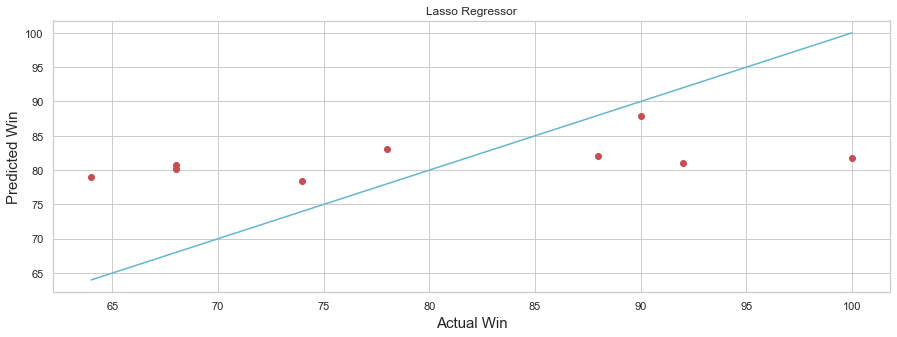

In [87]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,5))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'c-')
plt.xlabel('Actual Win', fontsize=15)
plt.ylabel('Predicted Win', fontsize=15)
plt.title("Lasso Regressor")
plt.show()